Matplotlib is building the font cache; this may take a moment.


Simulated Annealing Result:
  Best solution found: [0.07040573 0.0372049 ]
  Best cost found: 1.2409432681078894


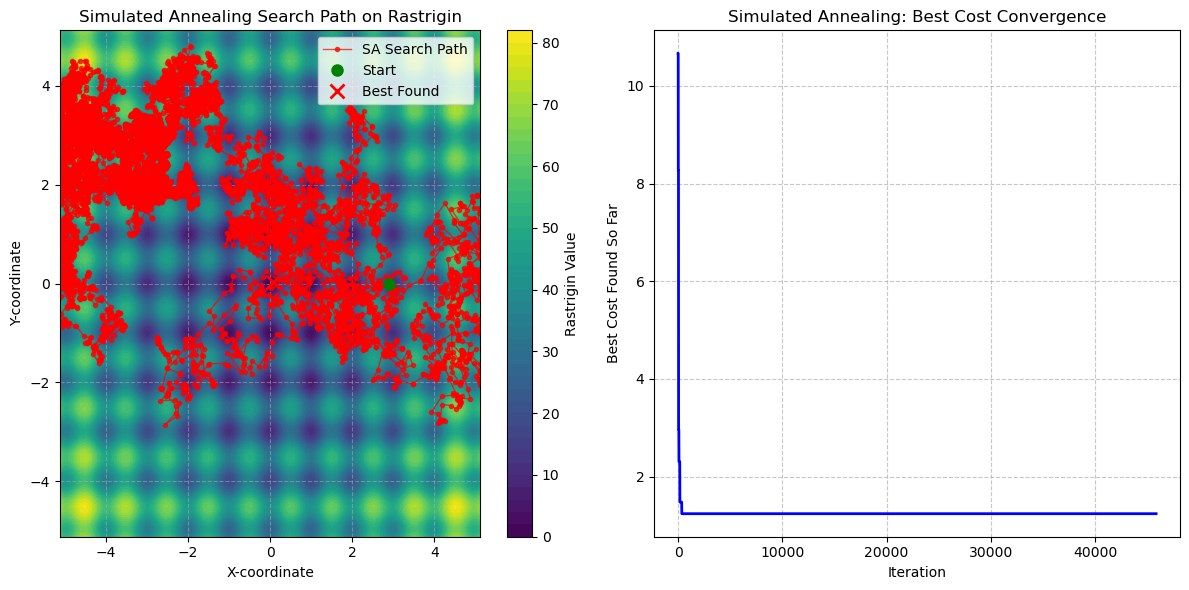

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random

# --- 1. Define the Objective Function (2D Rastrigin) ---
def rastrigin(x):
    """
    2D Rastrigin function.
    Global minimum is 0 at (0,0).
    Domain: typically [-5.12, 5.12] for each dimension.
    """
    A = 10
    return A * 2 + (x[0]**2 - A * np.cos(2 * np.pi * x[0])) + \
                   (x[1]**2 - A * np.cos(2 * np.pi * x[1]))

# --- 2. Simulated Annealing Algorithm ---
def simulated_annealing(objective_func, bounds, T_max, T_min, alpha, iterations_per_temp):
    current_solution = np.array([random.uniform(b[0], b[1]) for b in bounds])
    current_cost = objective_func(current_solution)

    best_solution = np.copy(current_solution)
    best_cost = current_cost

    T = T_max
    
    # Data to plot
    path = [current_solution]
    best_costs_over_time = [best_cost]

    while T > T_min:
        for _ in range(iterations_per_temp):
            # Generate a neighbor (small random step)
            step_size = random.uniform(-0.5, 0.5) * (T / T_max) # Step size scales with temperature
            new_solution = current_solution + np.array([random.uniform(-step_size, step_size), 
                                                         random.uniform(-step_size, step_size)])

            # Keep new_solution within bounds
            for i in range(len(bounds)):
                new_solution[i] = max(bounds[i][0], min(bounds[i][1], new_solution[i]))

            new_cost = objective_func(new_solution)

            delta_E = new_cost - current_cost # For minimization, positive delta_E means worse

            # Acceptance criterion
            if delta_E < 0:  # If new solution is better, accept it
                current_solution = np.copy(new_solution)
                current_cost = new_cost
            else:  # If new solution is worse, accept with a probability
                acceptance_prob = np.exp(-delta_E / T)
                if random.random() < acceptance_prob:
                    current_solution = np.copy(new_solution)
                    current_cost = new_cost
            
            # Update overall best solution found
            if current_cost < best_cost:
                best_solution = np.copy(current_solution)
                best_cost = current_cost
            
            path.append(current_solution)
            best_costs_over_time.append(best_cost)

        T *= alpha # Cooling schedule

    return best_solution, best_cost, np.array(path), np.array(best_costs_over_time)

# --- 3. Run the Demo and Plot Results ---
if __name__ == "__main__":
    bounds = [(-5.12, 5.12), (-5.12, 5.12)] # Search domain for x and y
    T_max = 100.0  # Initial temperature
    T_min = 0.01   # Final temperature
    alpha = 0.99   # Cooling rate (geometric)
    iterations_per_temp = 50 # Number of iterations at each temperature

    best_sol, best_val, path, best_costs_history = simulated_annealing(
        rastrigin, bounds, T_max, T_min, alpha, iterations_per_temp
    )

    print(f"Simulated Annealing Result:")
    print(f"  Best solution found: {best_sol}")
    print(f"  Best cost found: {best_val}")

    # Plotting the Rastrigin surface and the search path
    x_grid = np.linspace(bounds[0][0], bounds[0][1], 100)
    y_grid = np.linspace(bounds[1][0], bounds[1][1], 100)
    X, Y = np.meshgrid(x_grid, y_grid)
    Z = np.array([rastrigin([X[i, j], Y[i, j]]) for i in range(X.shape[0]) for j in range(X.shape[1])]).reshape(X.shape)

    plt.figure(figsize=(12, 6))

    # Subplot 1: 2D Contour Plot with Search Path
    plt.subplot(1, 2, 1)
    plt.contourf(X, Y, Z, levels=50, cmap='viridis')
    plt.colorbar(label='Rastrigin Value')
    plt.plot(path[:, 0], path[:, 1], 'r-o', markersize=3, linewidth=1, alpha=0.7, label='SA Search Path')
    plt.plot(path[0, 0], path[0, 1], 'go', markersize=8, label='Start')
    plt.plot(best_sol[0], best_sol[1], 'rx', markersize=10, markeredgewidth=2, label='Best Found')
    plt.xlabel('X-coordinate')
    plt.ylabel('Y-coordinate')
    plt.title('Simulated Annealing Search Path on Rastrigin')
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.5)

    # Subplot 2: Best Cost over Time
    plt.subplot(1, 2, 2)
    plt.plot(best_costs_history, 'b-', linewidth=2)
    plt.xlabel('Iteration')
    plt.ylabel('Best Cost Found So Far')
    plt.title('Simulated Annealing: Best Cost Convergence')
    plt.grid(True, linestyle='--', alpha=0.7)

    plt.tight_layout()
    plt.show()
